In [549]:
import random
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from collections import deque 
# import pulp  

In [550]:
def generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup):
    # Initialisation de la matrice de poids avec des valeurs infinies
    matrice = [[float('inf') for _ in range(num_sommets)] for _ in range(num_sommets)]

    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, max_intervalle_inf)
        intervalle_end = intervalle_start + random.randint(max_intervalle_inf, max_intervalle_sup)
        intervalles[i] = (intervalle_start, intervalle_end)

    # Utiliser Prim's algorithm pour créer un arbre couvrant minimal (MST)
    connected = set([0])
    edges = []

    while len(connected) < num_sommets:
        min_edge = (None, None, float('inf'))
        for u in connected:
            for v in range(num_sommets):
                if v not in connected and u != v:
                    poids = random.randint(1, max_poids_arete)
                    if poids < min_edge[2]:
                        min_edge = (u, v, poids)
        u, v, poids = min_edge
        if u is not None and v is not None:
            matrice[u][v] = poids
            matrice[v][u] = poids
            connected.add(v)
            edges.append((u, v, poids))

    # Ajouter des arêtes supplémentaires de manière aléatoire
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if matrice[i][j] == float('inf') and random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids

    return np.array(matrice), intervalles



In [551]:
#Variables nécessaires
num_sommets = 5
max_poids_arete = 10
max_intervalle_inf = 20
max_intervalle_sup = 100

# Générer les données du problème
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)

# Afficher la matrice pondérée
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row)

# Afficher les intervalles
print("\nIntervalles des sommets")
print(tsp_intervalles)


Matrice pondérée:
[inf  5.  1.  3. 10.]
[ 5. inf  4. inf inf]
[ 1.  4. inf inf inf]
[ 3. inf inf inf  4.]
[10. inf inf  4. inf]

Intervalles des sommets
{0: (4, 90), 1: (4, 39), 2: (9, 54), 3: (15, 109), 4: (11, 50)}


In [552]:
def calculate_cost(tour, matrice):
    cost = 0
    for i in range(len(tour) - 1):
        cost += matrice[tour[i]][tour[i + 1]] 
    cost += matrice[tour[-1]][tour[0]]  # Return to the starting city 
    return cost

In [553]:
def is_within_intervals(tour, intervalles):
    for i in range(len(tour)):
        start_time = i
        interval_start, interval_end = intervalles[tour[i]]
        if not (interval_start <= start_time <= interval_end):
            return False
    return True

In [554]:
def generate_neighbor(tour):
    i, j = random.sample(range(len(tour)), 2)
    tour[i], tour[j] = tour[j], tour[i]
    return tour

In [555]:
def hill_climbing(matrice, intervalles, max_iterations=1000):
    num_sommets = len(matrice)
    current_solution = list(range(num_sommets))
    random.shuffle(current_solution)
    
    current_cost = calculate_cost(current_solution, matrice)
    
    for _ in range(max_iterations):
        neighbor = generate_neighbor(current_solution.copy())
        neighbor_cost = calculate_cost(neighbor, matrice)
        
        if neighbor_cost != float('inf') and neighbor_cost < current_cost and is_within_intervals(neighbor, intervalles):
            current_solution = neighbor
            current_cost = neighbor_cost
            
    return current_solution, current_cost 

In [556]:
def plot_route(path, points, matrice):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c='blue')

    # Highlight the start node
    start_node = path[0]
    plt.scatter(points[start_node, 0], points[start_node, 1], c='red', label='Start Node')

    # Annotate nodes with their indices
    for idx, point in enumerate(points):
        plt.text(point[0], point[1], str(idx), fontsize=12, ha='right', va='bottom')

    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        plt.plot([points[from_node, 0], points[to_node, 0]], 
                 [points[from_node, 1], points[to_node, 1]], 'k-')
        # Add weights (distances) on the edges
        mid_point = (points[from_node] + points[to_node]) / 2
        weight = matrice[from_node][to_node]
        plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    # Add the weight for the edge returning to the start node
    from_node = path[-1]
    to_node = path[0]
    plt.plot([points[from_node, 0], points[to_node, 0]], 
             [points[from_node, 1], points[to_node, 1]], 'k-')
    mid_point = (points[from_node] + points[to_node]) / 2
    weight = matrice[from_node][to_node]
    plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    plt.title('Best Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()  

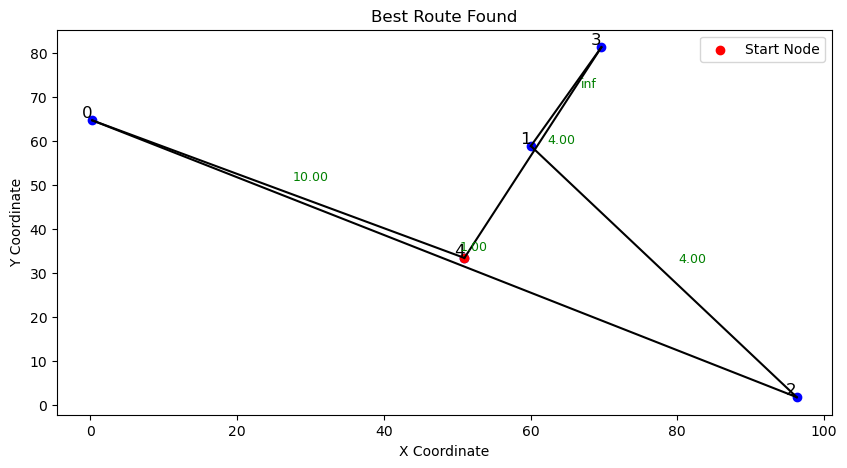

Best tour: [4, 0, 2, 1, 3]
Tour cost: 19.0


In [557]:
# Example usage
points = np.random.rand(num_sommets, 2) * 100 
num_sommets = 5
max_poids_arete = 10
max_intervalle_inf = 3
max_intervalle_sup = 6 
matrice, intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
solution, cost = hill_climbing(matrice, intervalles)   
if solution:
    plot_route(solution, points, tsp_matrice)   
print("Best tour:", solution)
print("Tour cost:", cost)   